# Notebook overview

Visualizes Out-of-Distribution (OOD) distance thresholds at global, per-species, and intra-species levels across various percentiles to analyze OOD detection sensitivity.

- Loads precomputed threshold dictionaries (pickle files) for global, per-species, and intra-species OOD strategies.
- Processes threshold data into pandas DataFrames for structured visualization.
- Generates line plots and distribution charts using matplotlib and seaborn to show the relationship between percentiles and distance thresholds.
- Saves the generated visualizations to the specified results directory.

The notebook was used for both datasets(original and resized) just adapte the paths.

# Preperation

### Imports

In [15]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import pickle

### Paths

In [16]:
# use_dataset = 'resized'
use_dataset = 'origin'

### prediction folder to load df
ORIGIN_THRESHOLD_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/models/ood/thresholds/{use_dataset}'
origin_threshold_dir_path = Path(ORIGIN_THRESHOLD_DIR_PATH)
if not origin_threshold_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {ORIGIN_THRESHOLD_DIR_PATH}")

### Folder to save results
RESULT_DIR_PATH = rf'/home/stud/jleick/masterArbeitProjekt/models/ood/thresholds/{use_dataset}/visualisation'
result_dir_path = Path(RESULT_DIR_PATH)
if not result_dir_path.exists():
    raise FileNotFoundError(f"Folder does not exist: {RESULT_DIR_PATH}")

# Function

### Function - load_thresholds

In [17]:
# Save resultes
def save_thresholds(file, save_path):
    try:
        with open(save_path, "wb") as f:
            pickle.dump(file, f)
        print(f"thresholds saved succesfully: {save_path} ")
    except (IOError, pickle.PickleError) as e:
        print(f"error occure while save trasholds: {e}")

# open resultes
def load_thresholds(load_path):
    try:
        with open(load_path, "rb") as f:
            threshold_dict = pickle.load(f)
        print("thresholds loaded succesfully")
        return threshold_dict
    except (IOError, pickle.PickleError, EOFError) as e:
        print(f"error occure while loaded trasholds: {e}")

### Function - convert_to_angles

In [18]:
def convert_to_angles(thresholds: np.array) -> np.array:
    return np.degrees(np.arccos(1 - np.stack(thresholds)))

### Function - plot_thresholds

In [19]:
def plot_threshold_for_every_percentile( thresholds: np.array, percentile: np.array, title:str):
    thresholds_angles = convert_to_angles(thresholds)

    bar_width = 0.4
    # x_positions = np.arange(0,len(thresholds_angles),0.5)
    x_positions = np.linspace(0, 50, 101)

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar( x_positions , thresholds_angles, width=bar_width, align='center')

    indices = [0] + list(range(5, len(percentile), 5))
    ax.set_xticks(
        [x_positions[i] for i in indices],
        labels=[f"{percentile[i]:.2f}" for i in indices],
        rotation=90
    )
    ax.set_xlim( -1, x_positions[-1] + 1)
    ax.set_ylim(0,95)

    ax.grid(visible=True, axis='y')
    
    ax.set_ylabel("Angle (°)")
    ax.set_xlabel('Percentile')
    ax.set_title(title)
    fig.tight_layout()
    return fig

### Function - plot_species_thresholds (at percentile)

In [20]:
def plot_species_thresholds( thresholds: np.array, labels: np.array, title:str):
    thresholds_angles = convert_to_angles(thresholds)
    nr_thresholds = len(thresholds)

    bar_width = 0.4
    #x_positions = np.arange(0,len(thresholds_angles),0.5)
    x_positions = np.linspace(0, nr_thresholds/2, nr_thresholds)

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar( x_positions , thresholds_angles, width=bar_width, align='center')

    indices = [0] + list(range(5, len(labels), 5))
    ax.set_xticks(
        [x_positions[i] for i in indices],
        labels=[f"{labels[i]}" for i in indices],
        rotation=90
    )
    ax.set_xlim( -1, x_positions[-1] + 1)
    ax.set_ylim(0,70)

    ax.grid(visible=True, axis='y')

    ax.set_ylabel("Angle (°)")
    ax.set_xlabel('Percentile')
    ax.set_title(title)
    # fig.tight_layout()
    return fig

### Function - plot_compare_species_thresholds (compare three different thresholds at percentile)

In [21]:
def plot_compare_species_thresholds( thresholds_over_all: np.array, thresholds_for_species: np.array, thresholds_in_species: np.array, labels: np.array, title:str):
    thresholds_1_angles = convert_to_angles(thresholds_over_all)
    thresholds_2_angles = convert_to_angles(thresholds_for_species)
    thresholds_3_angles = convert_to_angles(thresholds_in_species)

    nr_thresholds = len(labels)
    bar_width = 0.2 
    x_positions = np.arange(0, nr_thresholds * 0.7, 0.7)

    x_positions_1 = x_positions - bar_width
    x_positions_2 = x_positions
    x_positions_3 = x_positions + bar_width

    fig, ax = plt.subplots(figsize=(16, 8)) # figsize=(22, 12)
    ax.bar( x_positions_1 , height=thresholds_1_angles, width=bar_width, align='center', label='over_all', zorder=3)
    ax.bar( x_positions_2 , height=thresholds_2_angles, width=bar_width, align='center', label='for_species', zorder=3)
    ax.bar( x_positions_3 , height=thresholds_3_angles, width=bar_width, align='center', label='in_species', zorder=3)

    ax.set_xticks( x_positions_2[::5], labels[::5], rotation=90, fontsize=16)
    ax.set_xticks( x_positions_2, minor=True)
    ax.set_yticks(np.arange(0,71,5))
    ax.set_yticklabels(np.arange(0,71,5), fontsize=16)
    ax.set_yticks( np.arange(0,71,1), minor=True)
    ax.set_xlim( -0.5, x_positions[-1] + 0.5)
    ax.set_ylim(0,70)

    ax.grid(visible=True, axis='y')
    ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.5)

    ax.set_ylabel("Angle (°)", fontsize=16)
    ax.set_xlabel('Label', fontsize=16)
    # ax.set_title(title)
    ax.legend(fontsize=18,loc='lower right')
    fig.tight_layout()
    return fig

# Apply

### Apply - load_thresholds

In [22]:
# over_all_species
over_all_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_over_all_examples.pkl')
over_all_thresholds_095 = [ over_all_thresholds[0.95] ] * 91


# for_each_species
for_each_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_for_each_species.pkl')
for_each_species_thresholds_095 = {}
species_list = []

for species in for_each_thresholds:
    for_each_species_thresholds_095[species] = for_each_thresholds[species][0.95]
    species_list.append(species+1)


# in_each_species
in_each_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_in_each_species.pkl')
in_each_species_thresholds_095 = {}
species_list = []

for species in in_each_thresholds:
    in_each_species_thresholds_095[species] = in_each_thresholds[species][0.95]
    species_list.append(species+1)

thresholds loaded succesfully
thresholds loaded succesfully
thresholds loaded succesfully


### Apply - plot_species_thresholds

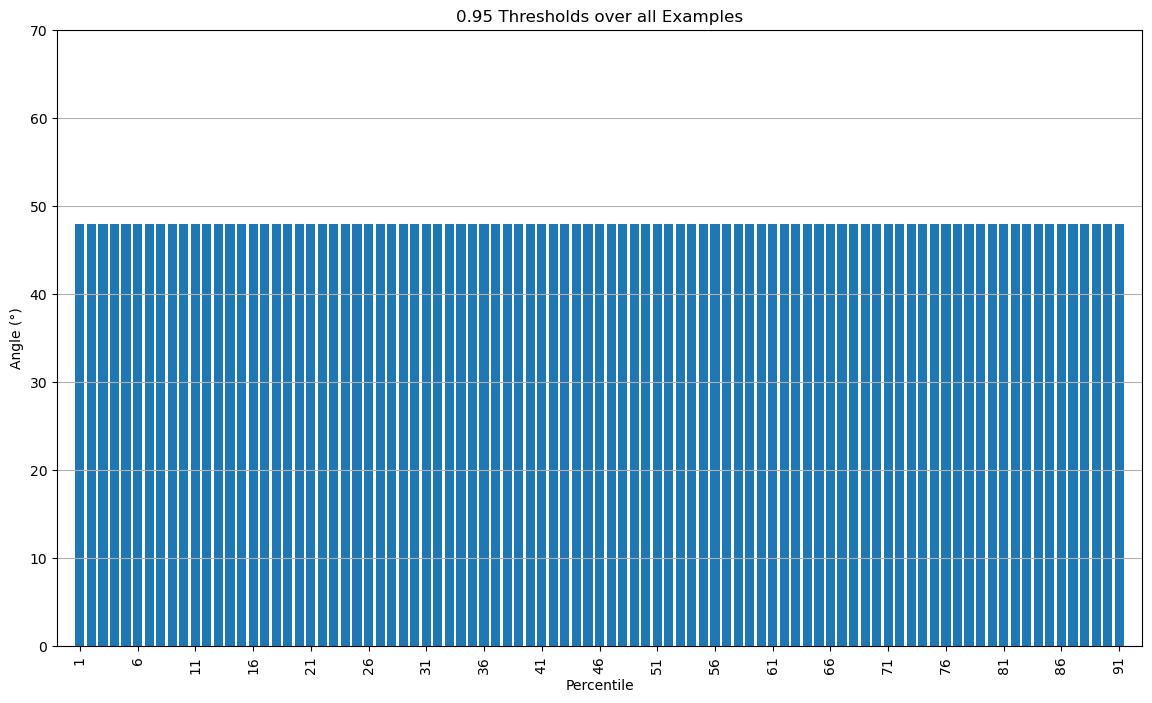

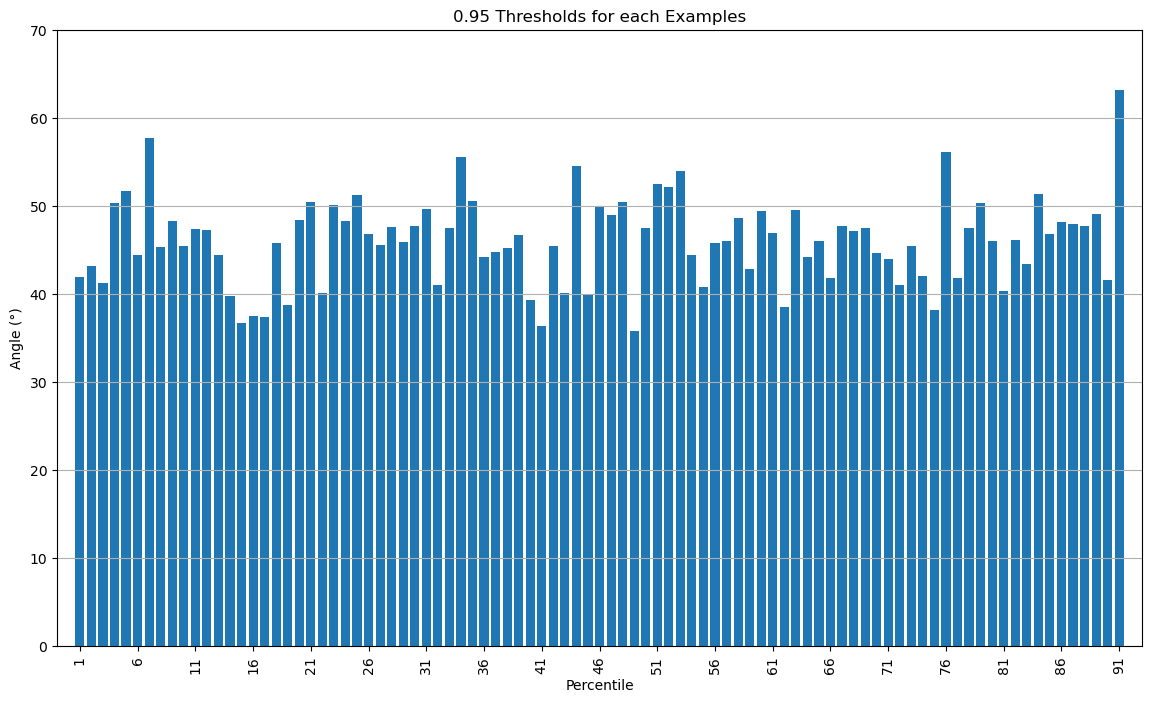

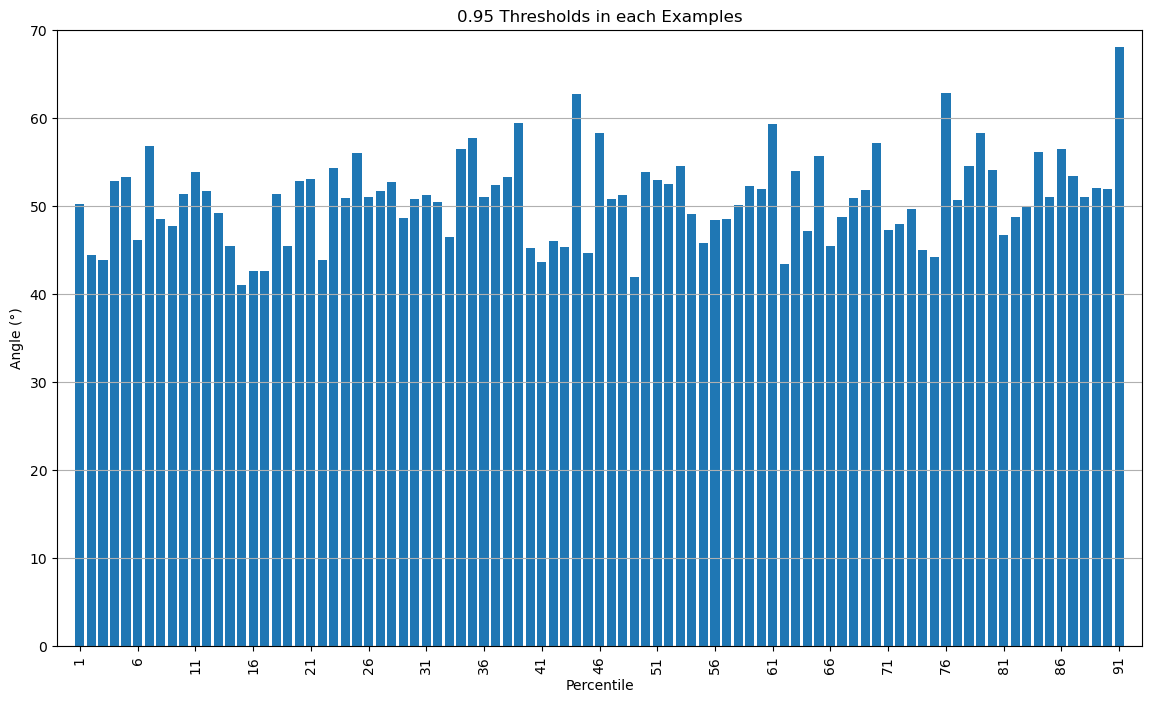

In [23]:
thresholds_over_all_plot = plot_species_thresholds(over_all_thresholds_095, species_list, "0.95 Thresholds over all Examples")
thresholds_over_all_plot.savefig( result_dir_path / 'over_all_example_visualisation.pdf')

thresholds_for_each_plot = plot_species_thresholds(list(for_each_species_thresholds_095.values()), species_list, "0.95 Thresholds for each Examples")
thresholds_for_each_plot.savefig( result_dir_path / 'for_each_species_visualisation.pdf')

thresholds_in_each_plot = plot_species_thresholds(list(in_each_species_thresholds_095.values()), species_list, "0.95 Thresholds in each Examples")
thresholds_in_each_plot.savefig( result_dir_path / 'in_each_species_visualisation.pdf')

### Apply - plot_compare_species_thresholds

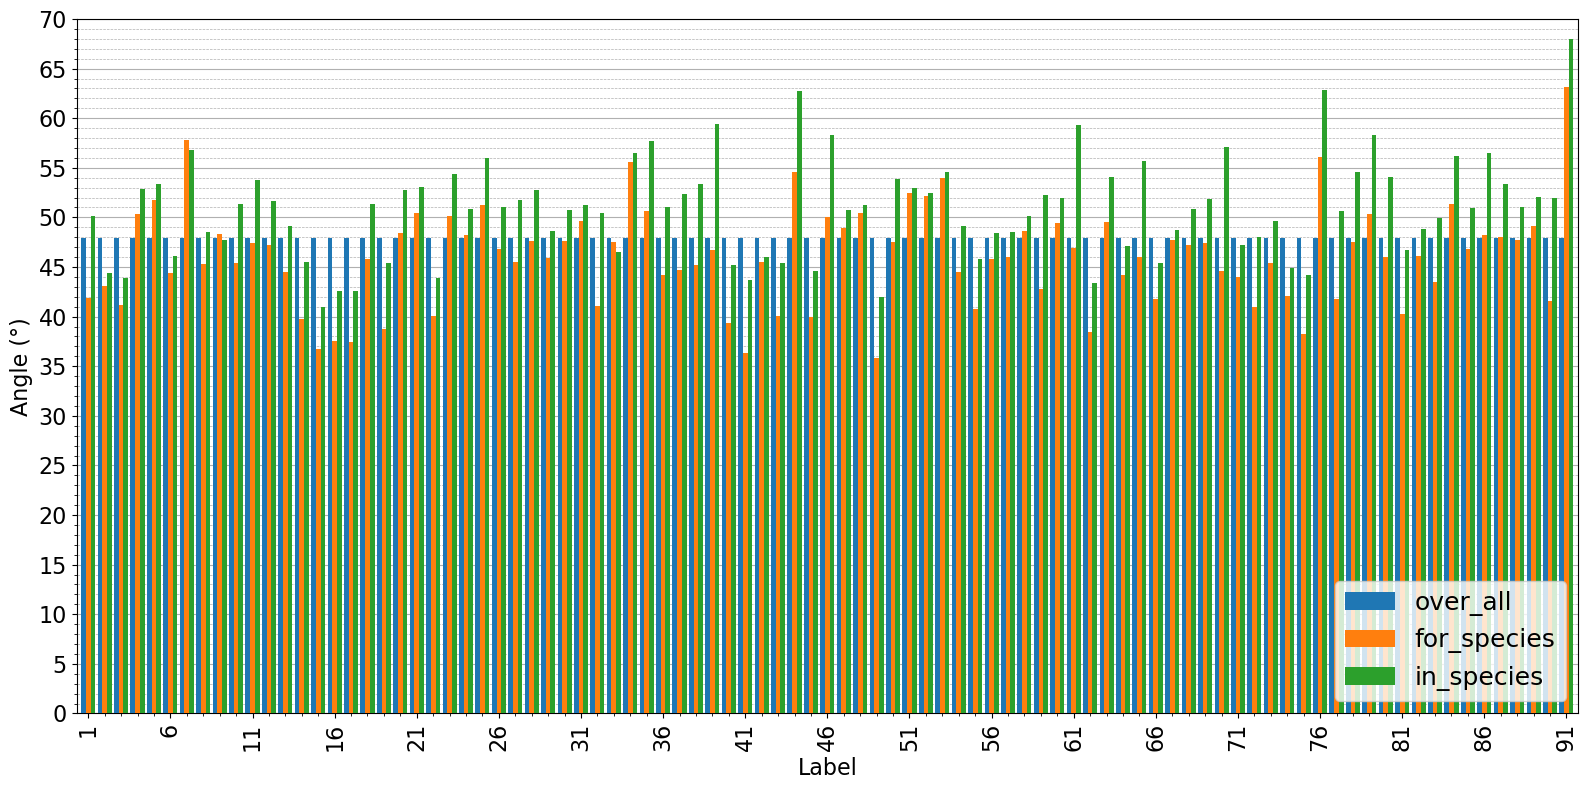

In [24]:
thresholds_compare_plot = plot_compare_species_thresholds(
    over_all_thresholds_095,
    list(for_each_species_thresholds_095.values()),
    list(in_each_species_thresholds_095.values()),
    species_list,
    "Different Thresholds calculation for each class at percentile 0.95")

thresholds_compare_plot.savefig( result_dir_path / 'compare_thresholds.pdf')

# For impression

In [25]:
percentiles = np.arange(0.0,1.001,0.01)
percentiles = np.round(percentiles, 2)

# in_each_species
over_all_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_over_all_examples.pkl')
for_each_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_for_each_species.pkl')
in_each_thresholds = load_thresholds( origin_threshold_dir_path / 'thresholds_in_each_species.pkl')

thresholds loaded succesfully
thresholds loaded succesfully
thresholds loaded succesfully


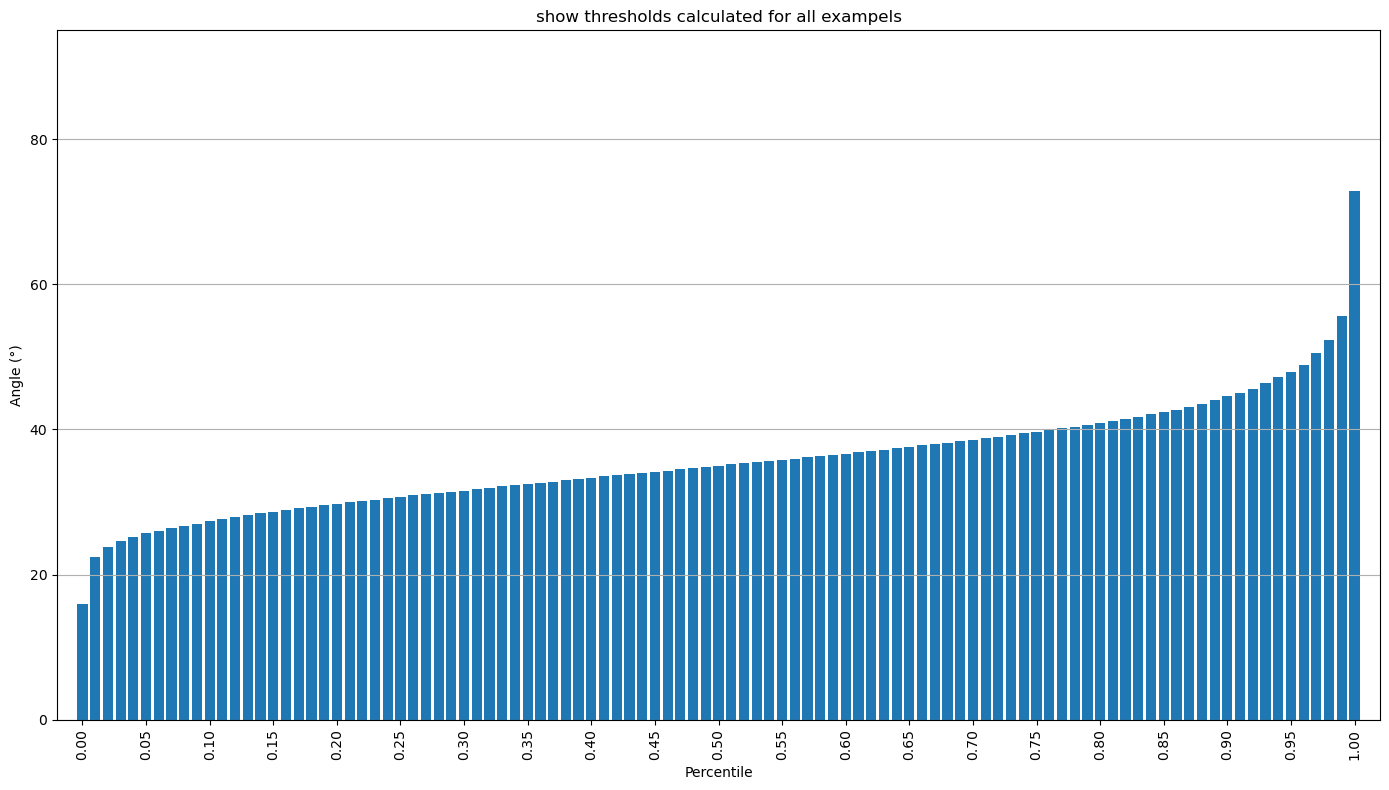

In [26]:
test = plot_threshold_for_every_percentile( list( over_all_thresholds.values() ), percentiles, 'show thresholds calculated for all exampels')

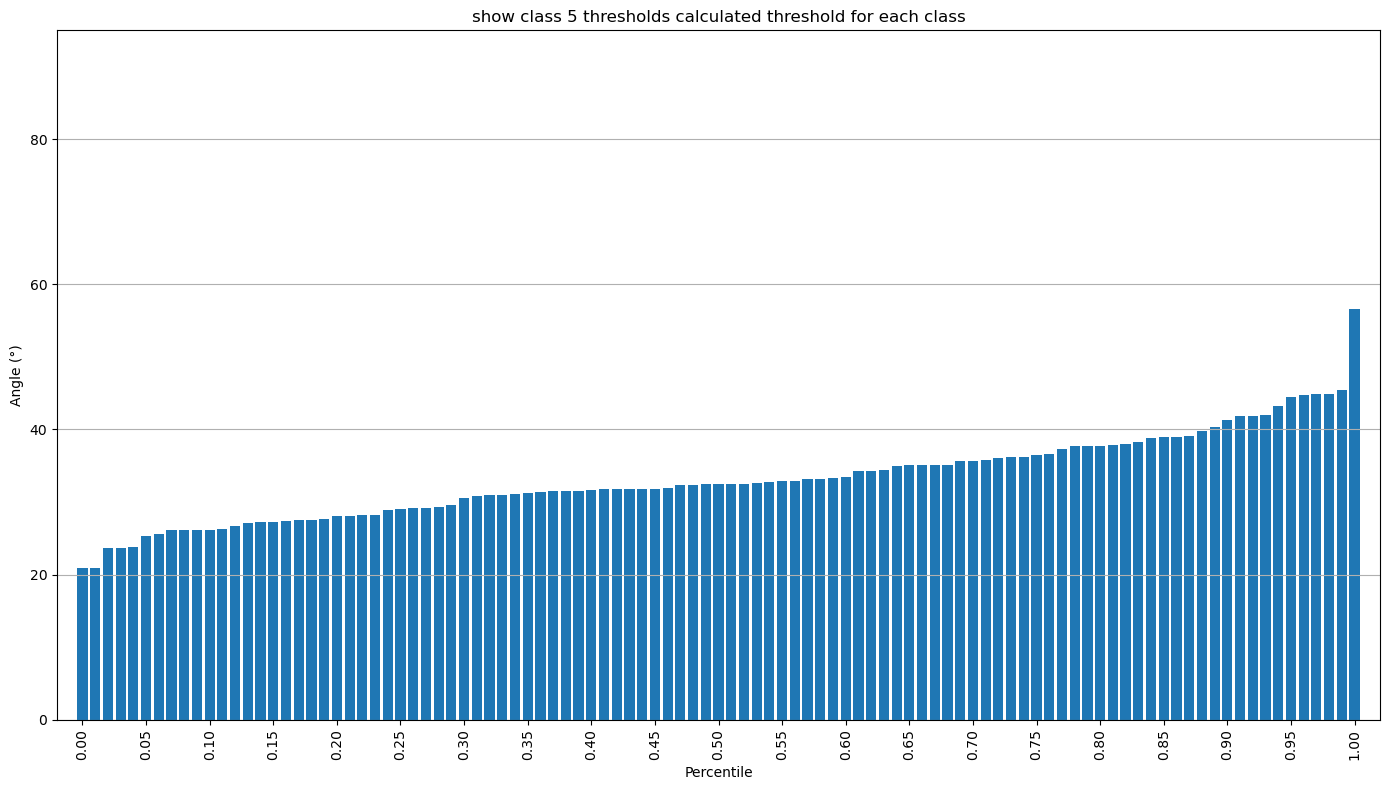

In [27]:
test = plot_threshold_for_every_percentile( list( for_each_thresholds[5].values() ), percentiles, 'show class 5 thresholds calculated threshold for each class')

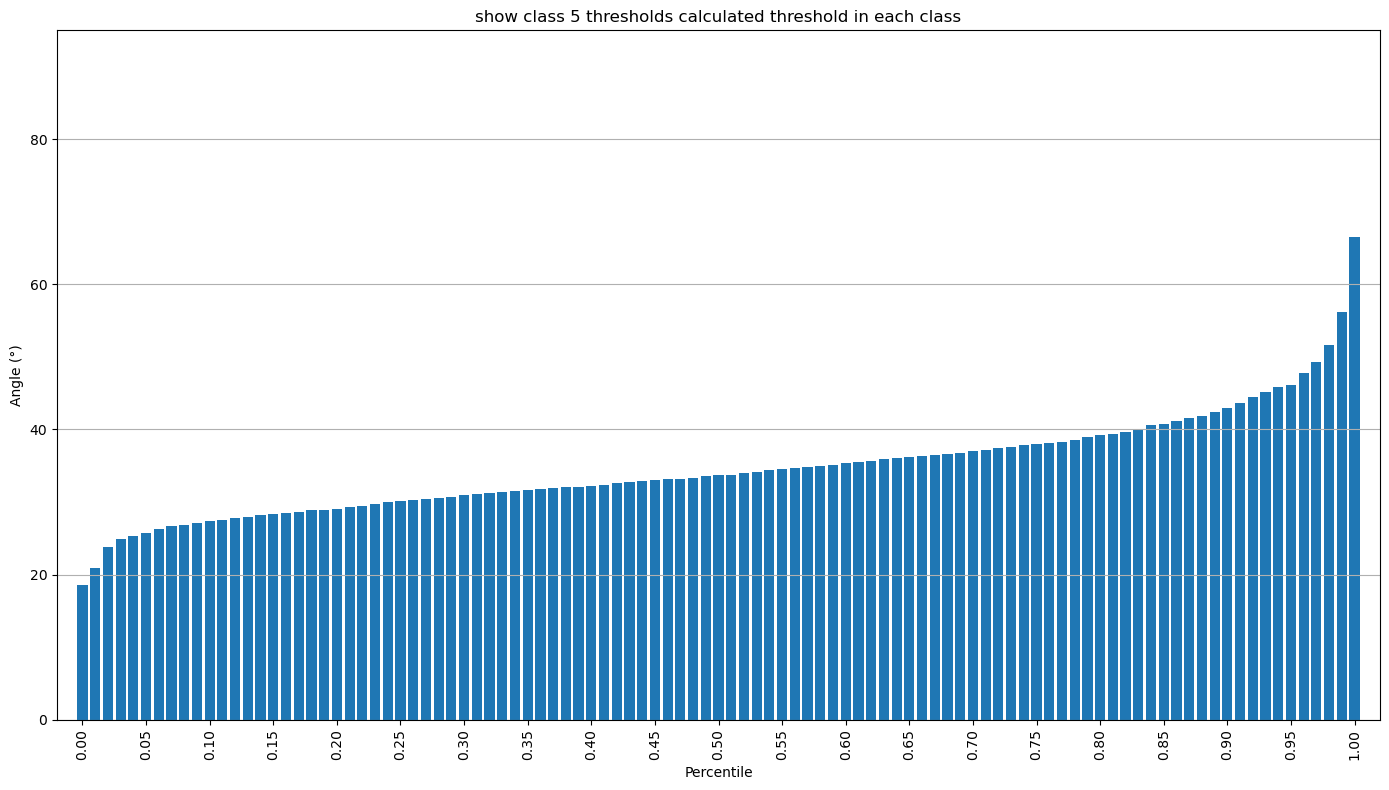

In [28]:
test = plot_threshold_for_every_percentile( list( in_each_thresholds[5].values() ), percentiles, 'show class 5 thresholds calculated threshold in each class')